In [10]:
PREPROC_TRAIN_DATA = True

In [11]:
import tensorflow as tf
from gradient_accumulator.GAModelWrapper import GAModelWrapper


######### MODEL #########


base_model = tf.keras.applications.ResNet152V2(include_top=True, 
                                                   weights=None, 
                                                input_shape=(360, 256, 2), 
                                                classes=1,
                                                classifier_activation="sigmoid")
inputs = tf.keras.Input(shape=(360, 256, 2))
x = base_model(inputs, training=False)
model = tf.keras.Model(inputs, x)

model = GAModelWrapper(accum_steps=1, inputs=model.input, outputs=model.output)


model.load_weights("model-255.h5")



/home/viktor/.local/lib/python3.10/site-packages/keras/applications/resnet.py:135: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


In [12]:
import pandas as pd
if PREPROC_TRAIN_DATA:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/train-preprocessed.csv")
else:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/test-preprocessed.csv")
df

,Unnamed: 0,id,target,filename,name,preprocessed_filename
0,0,001121a05,1,/media/viktor/T7/gravitational-waves-kaggle-20...,001121a05,/media/viktor/T7/gravitational-waves-kaggle-20...
1,1,004f23b2d,1,/media/viktor/T7/gravitational-waves-kaggle-20...,004f23b2d,/media/viktor/T7/gravitational-waves-kaggle-20...
2,2,00a6db666,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00a6db666,/media/viktor/T7/gravitational-waves-kaggle-20...
3,3,00f36a6ac,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00f36a6ac,/media/viktor/T7/gravitational-waves-kaggle-20...
4,4,010a387db,1,/media/viktor/T7/gravitational-waves-kaggle-20...,010a387db,/media/viktor/T7/gravitational-waves-kaggle-20...
...,...,...,...,...,...,...
595,595,fe38dbe64,1,/media/viktor/T7/gravitational-waves-kaggle-20...,fe38dbe64,/media/viktor/T7/gravitational-waves-kaggle-20...
596,596,feafd0d16,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feafd0d16,/media/viktor/T7/gravitational-waves-kaggle-20...
597,597,feeca844e,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feeca844e,/media/viktor/T7/gravitational-waves-kaggle-20...
598,598,ff5ad023f,1,/media/viktor/T7/gravitational-waves-kaggle-20...,ff5ad023f,/media/viktor/T7/gravitational-waves-kaggle-20...


In [13]:
# Replace "/media/viktor/T7/gravitational-waves-kaggle-2022/train" with "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/train" in preprocessed_filename
df["preprocessed_filename"] = df["preprocessed_filename"].apply(lambda x: x.replace("/media/viktor/T7/gravitational-waves-kaggle-2022", "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed"))

In [14]:
# Loop over the dataset and make predictions: save the predictions to a list and create a column in the dataframe
# with the predictions
import numpy as np
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(df))):
    
    # Get the path to the file
    path = df.iloc[i]["preprocessed_filename"]
    # Load the data
    data = np.load(path)
    # expand the dimensions
    data = np.expand_dims(data, axis=0)
    
    # data = data - np.min(data)
    # data = 2 * (data / np.max(data)  - 0.5)
    
    # Make a prediction
    prediction = model.predict(data, verbose=0)
    # Save the prediction
    predictions.append(prediction[0][0])
    
    if i % 1000 == 0:
        # clear backed memory
        tf.keras.backend.clear_session()
    
df["prediction"] = predictions
df

100%|██████████| 600/600 [00:41<00:00, 14.43it/s]


,Unnamed: 0,id,target,filename,name,preprocessed_filename,prediction
0,0,001121a05,1,/media/viktor/T7/gravitational-waves-kaggle-20...,001121a05,/media/viktor/T7/gravitational-waves-kaggle-20...,0.286078
1,1,004f23b2d,1,/media/viktor/T7/gravitational-waves-kaggle-20...,004f23b2d,/media/viktor/T7/gravitational-waves-kaggle-20...,0.328245
2,2,00a6db666,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00a6db666,/media/viktor/T7/gravitational-waves-kaggle-20...,0.316536
3,3,00f36a6ac,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00f36a6ac,/media/viktor/T7/gravitational-waves-kaggle-20...,0.305007
4,4,010a387db,1,/media/viktor/T7/gravitational-waves-kaggle-20...,010a387db,/media/viktor/T7/gravitational-waves-kaggle-20...,0.318445
...,...,...,...,...,...,...,...
595,595,fe38dbe64,1,/media/viktor/T7/gravitational-waves-kaggle-20...,fe38dbe64,/media/viktor/T7/gravitational-waves-kaggle-20...,0.317990
596,596,feafd0d16,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feafd0d16,/media/viktor/T7/gravitational-waves-kaggle-20...,0.335384
597,597,feeca844e,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feeca844e,/media/viktor/T7/gravitational-waves-kaggle-20...,0.272327
598,598,ff5ad023f,1,/media/viktor/T7/gravitational-waves-kaggle-20...,ff5ad023f,/media/viktor/T7/gravitational-waves-kaggle-20...,0.316021


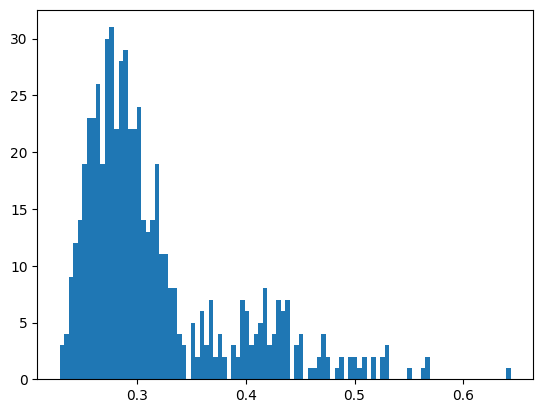

In [15]:
import matplotlib.pyplot as plt
plt.hist(df["prediction"], bins=100);

In [16]:
# calculate auc
from sklearn.metrics import roc_auc_score
if PREPROC_TRAIN_DATA:
    print(roc_auc_score(df["target"], df["prediction"]))

0.6946375


In [17]:
df_sub = df[["name", "prediction"]]
# rename prediction to target
df_sub = df_sub.rename(columns={"prediction": "target",
                                "name": "id"})
df_sub.to_csv("submission.csv", index=False)
df_sub

,id,target
0,001121a05,0.286078
1,004f23b2d,0.328245
2,00a6db666,0.316536
3,00f36a6ac,0.305007
4,010a387db,0.318445
...,...,...
595,fe38dbe64,0.317990
596,feafd0d16,0.335384
597,feeca844e,0.272327
598,ff5ad023f,0.316021


In [18]:
if PREPROC_TRAIN_DATA:
    df.to_csv("train_predictions.csv", index=False)
else:
    df.to_csv("test_predictions.csv", index=False)